In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('BF_data.csv', index_col=[0])
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,SAT_1,SAT_2,SAT_3,SAT_4
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,121.0,2.0,22.22,21.00,3.88,69.940478,73.583364,77.713731,82.332439,85.074844
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,125.0,1.0,22.56,21.00,3.94,71.454476,74.666066,77.198904,82.604995,84.877672
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,124.0,1.0,22.49,21.08,3.94,70.579462,74.837214,78.518159,84.475989,83.397999
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,115.0,1.0,22.36,21.13,3.99,70.179791,75.008361,80.865417,84.880888,83.368013
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,125.0,1.0,22.25,21.30,4.10,70.728470,75.799102,82.564532,84.282448,84.592822


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26471 entries, 0 to 26470
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      26471 non-null  object 
 1   CB_FLOW        26471 non-null  float64
 2   CB_PRESS       26471 non-null  float64
 3   CB_TEMP        26471 non-null  float64
 4   STEAM_FLOW     26471 non-null  float64
 5   STEAM_TEMP     26471 non-null  float64
 6   STEAM_PRESS    26471 non-null  float64
 7   O2_PRESS       26471 non-null  float64
 8   O2_FLOW        26471 non-null  float64
 9   O2_PER         26471 non-null  float64
 10  PCI            26471 non-null  float64
 11  ATM_HUMID      26471 non-null  float64
 12  HB_TEMP        26471 non-null  float64
 13  HB_PRESS       26471 non-null  float64
 14  TOP_PRESS      26471 non-null  float64
 15  TOP_TEMP1      26471 non-null  float64
 16  TOP_TEMP2      26471 non-null  float64
 17  TOP_TEMP3      26471 non-null  float64
 18  TOP_TE

In [4]:
x_vars = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
x_vars.drop('DATE_TIME',axis=1,inplace=True)
y_vars = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

print(x_vars.shape, y_vars.shape)

(26471, 25) (26471, 4)


In [5]:
x_vars.head()

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.940478
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.454476
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.579462
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.179791
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.728470


In [6]:
y_vars.head()

,SAT_1,SAT_2,SAT_3,SAT_4
0,73.583364,77.713731,82.332439,85.074844
1,74.666066,77.198904,82.604995,84.877672
2,74.837214,78.518159,84.475989,83.397999
3,75.008361,80.865417,84.880888,83.368013
4,75.799102,82.564532,84.282448,84.592822


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size=0.3,  random_state=42)

In [8]:
column_list = pd.DataFrame(x_vars.columns.to_list(), columns=['Params'])
column_list.to_csv('columns.csv', index = False)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# Building the model
model1 = Sequential()
model1.add(Dense(100, input_shape=(x_train.shape[1],), activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(4, activation='linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2600      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 4)                 104       
                                                                 
Total params: 9,029
Trainable params: 9,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compiling the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights= True)

In [12]:
# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model1.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    callbacks=[es],
                    epochs=500,
                    batch_size=100,
                    verbose=1)

Epoch 1/500
186/186 [==============================] - 3s 5ms/step - loss: 2028.4337 - mae: 33.6125 - val_loss: 275.5931 - val_mae: 11.7832
Epoch 2/500
186/186 [==============================] - 1s 4ms/step - loss: 211.4877 - mae: 10.0828 - val_loss: 173.2670 - val_mae: 9.1389
Epoch 3/500
186/186 [==============================] - 1s 3ms/step - loss: 164.1705 - mae: 8.7254 - val_loss: 153.8434 - val_mae: 8.3895
Epoch 4/500
186/186 [==============================] - 1s 4ms/step - loss: 147.5792 - mae: 8.1256 - val_loss: 138.4131 - val_mae: 7.9986
Epoch 5/500
186/186 [==============================] - 1s 4ms/step - loss: 138.2720 - mae: 7.7808 - val_loss: 130.2394 - val_mae: 7.6249
Epoch 6/500
186/186 [==============================] - 1s 4ms/step - loss: 132.1604 - mae: 7.5691 - val_loss: 127.8941 - val_mae: 7.5202
Epoch 7/500
186/186 [==============================] - 1s 3ms/step - loss: 127.1264 - mae: 7.4029 - val_loss: 120.3589 - val_mae: 7.2485
Epoch 8/500
186/186 [================

186/186 [==============================] - 1s 4ms/step - loss: 67.2786 - mae: 5.6996 - val_loss: 71.5536 - val_mae: 5.8665
Epoch 62/500
186/186 [==============================] - 1s 4ms/step - loss: 67.3756 - mae: 5.6786 - val_loss: 71.7159 - val_mae: 5.9195
Epoch 63/500
186/186 [==============================] - 1s 4ms/step - loss: 67.7506 - mae: 5.7134 - val_loss: 73.8842 - val_mae: 6.0463
Epoch 64/500
186/186 [==============================] - 1s 4ms/step - loss: 66.3419 - mae: 5.6642 - val_loss: 83.9891 - val_mae: 6.1891
Epoch 65/500
186/186 [==============================] - 1s 4ms/step - loss: 65.8689 - mae: 5.6290 - val_loss: 71.3815 - val_mae: 5.9419
Epoch 66/500
186/186 [==============================] - 1s 4ms/step - loss: 66.5314 - mae: 5.6656 - val_loss: 73.9634 - val_mae: 5.9496
Epoch 67/500
186/186 [==============================] - 1s 4ms/step - loss: 65.7966 - mae: 5.6408 - val_loss: 71.2747 - val_mae: 5.8083
Epoch 68/500
186/186 [==============================] - 1s 4m

186/186 [==============================] - 1s 4ms/step - loss: 57.5181 - mae: 5.2841 - val_loss: 63.0443 - val_mae: 5.5614
Epoch 122/500
186/186 [==============================] - 1s 4ms/step - loss: 56.8849 - mae: 5.2549 - val_loss: 66.1514 - val_mae: 5.7214
Epoch 123/500
186/186 [==============================] - 1s 4ms/step - loss: 57.0915 - mae: 5.2665 - val_loss: 61.8561 - val_mae: 5.4804
Epoch 124/500
186/186 [==============================] - 1s 4ms/step - loss: 55.9990 - mae: 5.2232 - val_loss: 64.4106 - val_mae: 5.6812
Epoch 125/500
186/186 [==============================] - 1s 4ms/step - loss: 56.6424 - mae: 5.2605 - val_loss: 67.0972 - val_mae: 5.6956
Epoch 126/500
186/186 [==============================] - 1s 4ms/step - loss: 57.0042 - mae: 5.2485 - val_loss: 67.5167 - val_mae: 5.6669
Epoch 127/500
186/186 [==============================] - 1s 4ms/step - loss: 56.7821 - mae: 5.2634 - val_loss: 65.8811 - val_mae: 5.6208
Epoch 128/500
186/186 [==============================] 

Epoch 181/500
186/186 [==============================] - 1s 4ms/step - loss: 52.7048 - mae: 5.0645 - val_loss: 62.4559 - val_mae: 5.4823
Epoch 182/500
186/186 [==============================] - 1s 4ms/step - loss: 51.8942 - mae: 5.0378 - val_loss: 59.1363 - val_mae: 5.2971
Epoch 183/500
186/186 [==============================] - 1s 4ms/step - loss: 51.7709 - mae: 5.0289 - val_loss: 62.6710 - val_mae: 5.4853
Epoch 184/500
186/186 [==============================] - 1s 4ms/step - loss: 51.9482 - mae: 5.0154 - val_loss: 64.0253 - val_mae: 5.4431
Epoch 185/500
186/186 [==============================] - 1s 4ms/step - loss: 52.2636 - mae: 5.0453 - val_loss: 61.0870 - val_mae: 5.4646
Epoch 186/500
186/186 [==============================] - 1s 4ms/step - loss: 51.5629 - mae: 5.0153 - val_loss: 60.0516 - val_mae: 5.4417
Epoch 187/500
186/186 [==============================] - 1s 4ms/step - loss: 51.4073 - mae: 4.9989 - val_loss: 59.6600 - val_mae: 5.3406
Epoch 188/500
186/186 [==================

Epoch 241/500
186/186 [==============================] - 1s 4ms/step - loss: 48.6205 - mae: 4.8700 - val_loss: 58.0169 - val_mae: 5.2613
Epoch 242/500
186/186 [==============================] - 1s 5ms/step - loss: 48.1747 - mae: 4.8593 - val_loss: 57.7002 - val_mae: 5.2376
Epoch 243/500
186/186 [==============================] - 1s 5ms/step - loss: 48.2734 - mae: 4.8536 - val_loss: 57.5004 - val_mae: 5.2088
Epoch 244/500
186/186 [==============================] - 1s 5ms/step - loss: 48.0618 - mae: 4.8406 - val_loss: 57.6209 - val_mae: 5.2744
Epoch 245/500
186/186 [==============================] - 1s 5ms/step - loss: 48.7016 - mae: 4.8535 - val_loss: 57.2313 - val_mae: 5.2622
Epoch 246/500
186/186 [==============================] - 1s 5ms/step - loss: 48.1276 - mae: 4.8514 - val_loss: 56.3647 - val_mae: 5.1814
Epoch 247/500
186/186 [==============================] - 1s 4ms/step - loss: 47.8530 - mae: 4.8228 - val_loss: 58.8705 - val_mae: 5.2577
Epoch 248/500
186/186 [==================

Epoch 301/500
186/186 [==============================] - 1s 4ms/step - loss: 47.1585 - mae: 4.7951 - val_loss: 57.0420 - val_mae: 5.1979
Epoch 302/500
186/186 [==============================] - 1s 5ms/step - loss: 45.7451 - mae: 4.7101 - val_loss: 55.8529 - val_mae: 5.1374
Epoch 303/500
186/186 [==============================] - 1s 4ms/step - loss: 46.7192 - mae: 4.7653 - val_loss: 59.5566 - val_mae: 5.4495
Epoch 304/500
186/186 [==============================] - 1s 4ms/step - loss: 45.7400 - mae: 4.7270 - val_loss: 58.8367 - val_mae: 5.3122
Epoch 305/500
186/186 [==============================] - 1s 4ms/step - loss: 46.2515 - mae: 4.7358 - val_loss: 56.5002 - val_mae: 5.2039
Epoch 306/500
186/186 [==============================] - 1s 4ms/step - loss: 46.8963 - mae: 4.7867 - val_loss: 56.0916 - val_mae: 5.2108
Epoch 307/500
186/186 [==============================] - 1s 4ms/step - loss: 45.4256 - mae: 4.7100 - val_loss: 55.6895 - val_mae: 5.1356
Epoch 308/500
186/186 [==================

Epoch 361/500
186/186 [==============================] - 1s 5ms/step - loss: 43.6919 - mae: 4.6331 - val_loss: 55.8700 - val_mae: 5.1359
Epoch 362/500
186/186 [==============================] - 1s 5ms/step - loss: 43.8356 - mae: 4.6280 - val_loss: 55.3345 - val_mae: 5.1149
Epoch 363/500
186/186 [==============================] - 1s 5ms/step - loss: 43.4190 - mae: 4.6063 - val_loss: 55.1404 - val_mae: 5.1463
Epoch 364/500
186/186 [==============================] - 1s 5ms/step - loss: 44.8210 - mae: 4.6731 - val_loss: 55.2521 - val_mae: 5.1323
Epoch 365/500
186/186 [==============================] - 1s 4ms/step - loss: 43.9254 - mae: 4.6310 - val_loss: 62.9706 - val_mae: 5.4949
Epoch 366/500
186/186 [==============================] - 1s 4ms/step - loss: 44.5370 - mae: 4.6617 - val_loss: 56.0475 - val_mae: 5.1517
Epoch 367/500
186/186 [==============================] - 1s 4ms/step - loss: 44.1104 - mae: 4.6545 - val_loss: 56.6468 - val_mae: 5.1823
Epoch 368/500
186/186 [==================

In [13]:
trainpreds = model1.predict(x_train)
predicted_val = model1.predict(x_test)

249/249 [==============================] - 1s 2ms/step


In [14]:
print(f"The accuracy of the ANN model is : {round(r2_score(y_test,predicted_val)*100,4)}")

The accuracy of the ANN model is : 92.2477


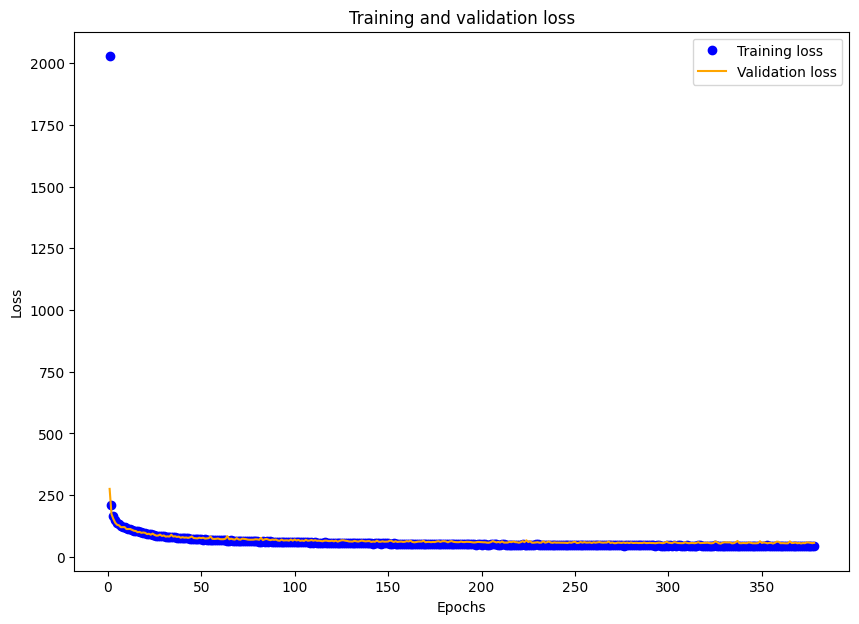

In [15]:
plt.figure(figsize=(10,7))
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
val_loss_values

[275.59307861328125,
 173.26695251464844,
 153.84341430664062,
 138.41307067871094,
 130.23941040039062,
 127.89413452148438,
 120.35894775390625,
 120.52595520019531,
 120.8905029296875,
 112.80594635009766,
 112.92808532714844,
 113.10613250732422,
 109.78752899169922,
 106.0397720336914,
 104.92623901367188,
 100.0596694946289,
 101.32858276367188,
 97.6273422241211,
 98.87601470947266,
 97.58009338378906,
 92.43463134765625,
 93.95256805419922,
 90.10786437988281,
 94.41141510009766,
 89.36920166015625,
 86.14511108398438,
 86.68002319335938,
 90.28221130371094,
 84.95075225830078,
 86.9443359375,
 82.28034210205078,
 83.29703521728516,
 82.30292510986328,
 90.03670501708984,
 82.53288269042969,
 83.6814956665039,
 80.95310974121094,
 82.18583679199219,
 77.80098724365234,
 79.92379760742188,
 77.96273040771484,
 78.67631530761719,
 76.96749114990234,
 79.19940185546875,
 82.54177856445312,
 76.3597412109375,
 75.89695739746094,
 75.00692749023438,
 77.92530059814453,
 76.130355834

249/249 [==============================] - 1s 2ms/step


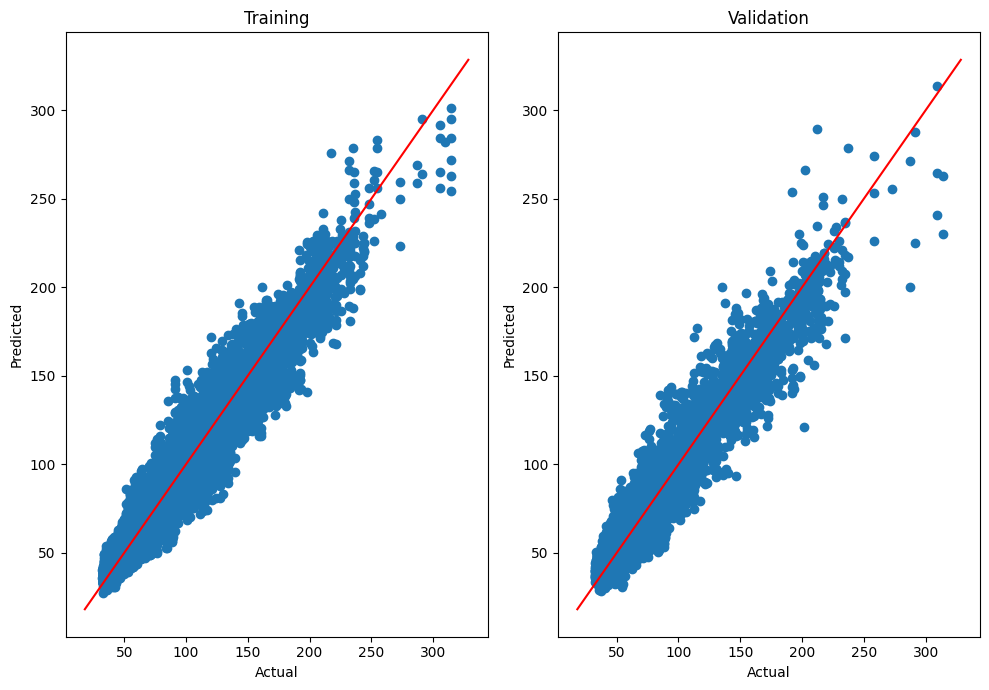

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,7)) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model1.predict(x_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model1.predict(x_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [18]:
import joblib
joblib.dump(model1, 'dnn_model.pkl')

['dnn_model.pkl']

In [19]:
cols = x_vars.columns.to_list()
row = np.array([311727,3.15,129,4,213,3.34,3.2,7296,23.08,32,24.56,1060,2.99,1.5,112,135,107,130,0,121,2,22.22,21,3.88,69.940478])
row = scaler.transform([row])
X = pd.DataFrame(row, columns=cols)
prediction = model1.predict(X)
prediction

C:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 168ms/step


array([[75.17971, 77.26591, 79.5214 , 81.22738]], dtype=float32)